<a href="https://colab.research.google.com/github/kradanfi/Data-Prepare-cheat-sheet/blob/master/ANN_assignment_randomforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime → "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Select the Runtime → "Change runtime type" menu to enable a GPU accelerator, 
and then re-execute this cell.


In [1]:
# from tsfresh import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import pandas as pd
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from tensorflow.keras.callbacks import *
import tensorflow.keras.backend as K
import subprocess
import os
from tqdm import tqdm_notebook
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Prepare Data

In [2]:
# !pip3 install kaggle
import os
os.environ['KAGGLE_USERNAME'] = "kunnachai" # username from the json file
os.environ['KAGGLE_KEY'] = "8512845a6c7fea78a239a93485a1d1f6" # key from the json file
!kaggle datasets download -d kunnachai/hiv-drug-resistance
!unzip hiv-drug-resistance.zip

  0% 0.00/128k [00:00<?, ?B/s]
100% 128k/128k [00:00<00:00, 36.7MB/s]
Archive:  hiv-drug-resistance.zip
  inflating: GENO.xls                


In [3]:
!ls

GENO.xls  hiv-drug-resistance.zip  sample_data


#Extract Feature


#Feature Selection

In [4]:
df_NFV = pd.read_excel('GENO.xls',sheet_name=0)
df_NFV

,ID,Index,StanfordID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,class,logFC
0,1,599,RC-008-023-12011,13,18,16,17,10,19,14,15,13,10,18,17,8,9,8,6,6,14,10,9,4,1,10,10,3,17,6,1,3,3,17,18,10,4,4,8,12,...,8,13,8,4,8,2,6,7,9,1,8,6,17,18,10,18,6,13,17,13,18,12,8,8,6,15,12,10,10,17,14,8,6,2,17,10,12,5,0,0.041393
1,2,322,CA24203,13,14,18,17,10,19,14,15,13,8,18,17,18,9,8,6,6,14,10,9,4,1,10,10,3,17,6,1,3,3,17,18,10,4,4,11,12,...,8,13,8,4,8,2,6,7,9,1,8,6,17,18,10,8,6,13,17,13,18,12,8,8,6,15,12,10,10,17,14,8,6,2,17,10,12,5,1,0.477121
2,3,196,CA9819,13,14,17,17,10,19,14,15,13,5,18,17,8,9,18,6,6,14,8,18,4,1,10,10,3,17,6,1,3,3,17,18,10,4,4,8,12,...,18,1,8,4,8,2,6,7,9,18,8,6,17,18,10,18,6,13,17,13,17,12,18,18,6,15,12,10,11,17,14,10,6,2,17,10,12,5,1,1.204120
3,4,758,YPpat5,13,14,18,17,10,19,14,15,13,5,18,17,8,9,8,6,6,14,10,15,4,1,10,10,3,17,6,1,3,3,17,18,8,4,4,8,16,...,8,13,8,4,8,2,6,7,9,18,8,6,17,18,10,18,6,13,17,13,2,12,8,8,6,15,12,10,11,17,14,8,6,2,17,10,12,5,1,2.250420
4,5,757,YPpat4,13,14,18,17,10,19,14,15,13,8,18,17,8,9,8,6,6,14,10,15,4,1,10,10,3,17,6,1,3,3,17,18,10,4,4,8,16,...,8,13,8,4,8,2,6,7,9,18,8,6,17,18,10,18,6,13,17,13,1,12,8,8,6,15,12,10,10,17,14,8,6,2,17,10,12,5,1,2.195346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,598,202,KSC-11,13,14,16,17,10,19,14,15,13,10,18,17,8,9,8,6,6,14,10,9,4,1,10,10,3,17,6,1,3,3,17,18,10,4,4,11,12,...,18,13,8,4,8,2,6,7,9,1,8,6,17,18,10,8,6,13,17,13,18,12,8,8,6,15,12,10,10,17,14,10,6,2,17,10,12,5,1,0.518514
622,602,420,150755,13,14,16,17,10,19,14,15,13,10,18,17,8,9,8,6,6,14,10,9,4,1,10,10,3,17,6,1,3,3,17,18,10,4,4,11,12,...,8,13,11,4,8,2,6,7,15,1,8,6,17,18,10,18,6,13,17,13,18,12,8,8,6,15,12,10,10,17,14,8,6,2,17,10,12,5,0,-0.301030
623,610,271,RZ-L4,13,14,16,17,10,19,14,15,13,10,18,17,8,9,8,6,6,14,10,9,4,1,10,10,3,17,6,1,3,3,17,18,10,4,4,11,12,...,8,13,8,4,8,2,6,7,9,1,8,6,17,18,10,8,6,13,17,13,18,12,8,8,6,15,16,10,10,17,14,8,6,2,17,10,12,5,1,1.110590
624,617,6,SD-2,13,14,16,17,10,19,14,15,13,10,18,17,8,9,8,6,6,14,10,9,4,1,10,10,3,17,6,1,3,3,17,18,10,4,4,11,12,...,8,13,8,4,8,2,6,7,9,1,8,6,17,18,10,18,6,13,17,13,18,12,8,8,6,15,12,10,10,17,14,8,6,2,17,10,12,5,0,0.000000


In [5]:
df_IDV = pd.read_excel('GENO.xls',sheet_name=1)
df_IDV

,ID,Index,StanfordID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,class,LogFC
0,628,674,A0173,13,14,8,17,10,19,14,15,13,10,18,17,8,9,8,6,6,14,10,9,4,1,10,10,3,17,6,1,3,3,17,18,10,4,4,11,12,...,8,10,18,4,8,2,6,7,9,1,8,6,17,18,10,18,6,13,17,13,18,12,8,8,6,15,12,10,10,17,14,8,6,2,17,10,12,5,0,-0.22
1,625,97,CA12624,13,14,8,17,10,19,14,15,13,10,18,17,8,9,8,6,6,14,10,9,4,1,10,10,3,17,6,1,3,3,17,18,10,4,4,11,12,...,8,10,18,4,8,2,6,7,9,1,8,6,17,18,10,18,6,13,17,13,18,12,8,8,6,15,12,10,10,17,14,8,6,2,17,10,12,5,0,0.08
2,624,435,207692,13,14,8,17,10,19,14,15,13,10,18,17,8,9,8,6,6,14,10,9,4,1,10,10,3,17,6,1,3,3,17,18,10,4,4,11,12,...,8,10,8,4,8,2,6,7,15,1,8,6,17,18,10,18,6,13,17,13,18,12,8,8,6,15,12,10,10,17,14,8,6,2,17,10,12,5,0,-0.10
3,623,681,A0222,13,14,8,17,10,19,14,15,13,10,18,17,8,9,8,6,6,14,10,9,4,1,10,10,3,17,6,1,3,3,17,18,10,4,4,11,12,...,8,10,18,4,8,2,6,7,9,1,8,6,17,18,10,18,6,13,17,13,18,12,8,8,6,15,12,10,10,17,14,8,6,2,17,10,12,5,0,-0.10
4,622,626,Bru-1,13,14,8,17,10,19,14,15,13,10,18,17,8,9,8,6,6,14,10,9,4,1,10,10,3,17,6,1,3,3,17,18,10,4,4,11,16,...,8,10,8,4,8,2,6,7,9,1,8,6,17,18,10,18,6,13,17,13,18,12,8,8,6,15,12,10,10,17,14,8,6,2,17,10,12,5,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590,60,382,NP-J1,13,14,8,17,10,19,14,15,13,8,18,17,8,9,8,6,6,14,10,8,4,1,10,10,3,17,6,1,3,3,17,18,10,4,4,8,12,...,8,13,8,4,8,2,6,7,9,18,8,6,17,18,10,18,6,13,17,13,17,12,8,8,6,15,12,10,10,17,14,8,6,2,17,10,12,5,1,1.40
591,58,53,SD-1_5,13,14,8,17,10,19,14,15,13,8,18,17,18,9,8,6,6,14,10,8,4,1,10,10,3,17,6,1,3,3,17,18,10,4,3,8,3,...,8,13,8,4,5,2,6,7,9,18,8,6,17,18,10,18,6,13,17,13,17,12,8,8,6,15,12,10,10,17,14,8,6,2,17,10,12,5,1,1.45
592,31,68,P682,13,14,8,17,10,19,14,15,13,8,18,17,8,9,8,6,6,14,10,15,4,1,10,10,3,17,6,1,3,3,17,18,10,4,4,8,12,...,8,13,8,4,8,2,6,7,9,18,8,6,17,18,10,18,6,13,17,13,1,12,8,8,6,15,12,10,11,17,14,8,6,2,17,10,12,5,1,1.51
593,29,516,CA36157,13,14,8,17,10,19,14,15,13,8,18,17,8,9,8,6,6,14,10,15,4,1,10,10,3,17,6,1,3,3,17,18,10,4,3,8,12,...,8,13,8,4,8,2,6,7,9,18,8,6,17,18,10,18,6,13,17,13,18,12,18,8,6,15,12,10,11,17,14,10,6,2,17,10,12,5,1,1.08


In [51]:
df_SQV = pd.read_excel('GENO.xls',sheet_name=2)
df_SQV

,ID,Index,StanfordID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,class,LogFC
0,628,674,A0173,13,14,8,17,10,19,14,15,13,10,18,17,8,9,8,6,6,14,10,9,4,1,10,10,3,17,6,1,3,3,17,18,10,4,4,11,12,...,8,10,18,4,8,2,6,7,9,1,8,6,17,18,10,18,6,13,17,13,18,12,8,8,6,15,12,10,10,17,14,8,6,2,17,10,12,5,0,-0.30
1,627,123,CA17593,13,14,8,17,10,19,14,15,13,10,18,17,8,9,8,6,6,14,10,9,4,1,10,10,3,17,6,1,3,3,17,18,10,4,4,11,12,...,8,10,18,4,8,2,6,7,9,1,11,6,17,18,10,18,6,13,17,13,18,12,8,8,6,15,12,10,10,17,14,8,6,2,17,10,12,5,0,-0.70
2,625,97,CA12624,13,14,8,17,10,19,14,15,13,10,18,17,8,9,8,6,6,14,10,9,4,1,10,10,3,17,6,1,3,3,17,18,10,4,4,11,12,...,8,10,18,4,8,2,6,7,9,1,8,6,17,18,10,18,6,13,17,13,18,12,8,8,6,15,12,10,10,17,14,8,6,2,17,10,12,5,0,-0.05
3,624,435,207692,13,14,8,17,10,19,14,15,13,10,18,17,8,9,8,6,6,14,10,9,4,1,10,10,3,17,6,1,3,3,17,18,10,4,4,11,12,...,8,10,8,4,8,2,6,7,15,1,8,6,17,18,10,18,6,13,17,13,18,12,8,8,6,15,12,10,10,17,14,8,6,2,17,10,12,5,0,-0.05
4,623,681,A0222,13,14,8,17,10,19,14,15,13,10,18,17,8,9,8,6,6,14,10,9,4,1,10,10,3,17,6,1,3,3,17,18,10,4,4,11,12,...,8,10,18,4,8,2,6,7,9,1,8,6,17,18,10,18,6,13,17,13,18,12,8,8,6,15,12,10,10,17,14,8,6,2,17,10,12,5,0,-0.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,60,382,NP-J1,13,14,8,17,10,19,14,15,13,8,18,17,8,9,8,6,6,14,10,8,4,1,10,10,3,17,6,1,3,3,17,18,10,4,4,8,12,...,8,13,8,4,8,2,6,7,9,18,8,6,17,18,10,18,6,13,17,13,17,12,8,8,6,15,12,10,10,17,14,8,6,2,17,10,12,5,1,0.68
602,58,53,SD-1_5,13,14,8,17,10,19,14,15,13,8,18,17,18,9,8,6,6,14,10,8,4,1,10,10,3,17,6,1,3,3,17,18,10,4,3,8,3,...,8,13,8,4,5,2,6,7,9,18,8,6,17,18,10,18,6,13,17,13,17,12,8,8,6,15,12,10,10,17,14,8,6,2,17,10,12,5,1,0.71
603,18,147,CA37686,13,14,8,17,10,19,14,15,13,8,18,17,8,9,18,6,6,14,10,15,4,1,10,10,3,17,6,1,3,3,17,8,10,4,4,8,3,...,8,13,8,4,8,2,6,7,9,18,8,16,17,18,10,18,6,13,17,13,17,12,8,18,6,15,12,10,11,17,14,8,6,2,17,10,12,5,1,1.76
604,30,366,DK-7505,13,14,8,17,10,19,14,15,13,8,18,17,8,9,8,6,6,14,10,15,4,1,10,10,3,17,6,1,3,3,17,18,10,4,4,8,12,...,18,13,8,4,8,2,6,7,9,18,8,6,17,18,10,18,6,13,17,13,1,12,8,8,6,15,12,10,11,17,14,8,6,2,17,10,12,5,1,0.85


In [7]:
df_NFV = df_NFV.drop(df_NFV.columns[[0,1,2,-1]], axis=1)
df_NFV.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,class
0,13,18,16,17,10,19,14,15,13,10,18,17,8,9,8,6,6,14,10,9,4,1,10,10,3,17,6,1,3,3,17,18,10,4,4,8,12,10,13,6,...,14,8,13,8,4,8,2,6,7,9,1,8,6,17,18,10,18,6,13,17,13,18,12,8,8,6,15,12,10,10,17,14,8,6,2,17,10,12,5,0
1,13,14,18,17,10,19,14,15,13,8,18,17,18,9,8,6,6,14,10,9,4,1,10,10,3,17,6,1,3,3,17,18,10,4,4,11,12,10,13,6,...,14,8,13,8,4,8,2,6,7,9,1,8,6,17,18,10,8,6,13,17,13,18,12,8,8,6,15,12,10,10,17,14,8,6,2,17,10,12,5,1
2,13,14,17,17,10,19,14,15,13,5,18,17,8,9,18,6,6,14,8,18,4,1,10,10,3,17,6,1,3,3,17,18,10,4,4,8,12,10,13,6,...,14,18,1,8,4,8,2,6,7,9,18,8,6,17,18,10,18,6,13,17,13,17,12,18,18,6,15,12,10,11,17,14,10,6,2,17,10,12,5,1
3,13,14,18,17,10,19,14,15,13,5,18,17,8,9,8,6,6,14,10,15,4,1,10,10,3,17,6,1,3,3,17,18,8,4,4,8,16,10,13,6,...,14,8,13,8,4,8,2,6,7,9,18,8,6,17,18,10,18,6,13,17,13,2,12,8,8,6,15,12,10,11,17,14,8,6,2,17,10,12,5,1
4,13,14,18,17,10,19,14,15,13,8,18,17,8,9,8,6,6,14,10,15,4,1,10,10,3,17,6,1,3,3,17,18,10,4,4,8,16,10,13,6,...,14,8,13,8,4,8,2,6,7,9,18,8,6,17,18,10,18,6,13,17,13,1,12,8,8,6,15,12,10,10,17,14,8,6,2,17,10,12,5,1


In [8]:
df_IDV = df_IDV.drop(df_IDV.columns[[0,1,2,-1]], axis=1)
df_IDV.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,class
0,13,14,8,17,10,19,14,15,13,10,18,17,8,9,8,6,6,14,10,9,4,1,10,10,3,17,6,1,3,3,17,18,10,4,4,11,12,10,13,6,...,14,8,10,18,4,8,2,6,7,9,1,8,6,17,18,10,18,6,13,17,13,18,12,8,8,6,15,12,10,10,17,14,8,6,2,17,10,12,5,0
1,13,14,8,17,10,19,14,15,13,10,18,17,8,9,8,6,6,14,10,9,4,1,10,10,3,17,6,1,3,3,17,18,10,4,4,11,12,10,13,6,...,14,8,10,18,4,8,2,6,7,9,1,8,6,17,18,10,18,6,13,17,13,18,12,8,8,6,15,12,10,10,17,14,8,6,2,17,10,12,5,0
2,13,14,8,17,10,19,14,15,13,10,18,17,8,9,8,6,6,14,10,9,4,1,10,10,3,17,6,1,3,3,17,18,10,4,4,11,12,10,13,6,...,14,8,10,8,4,8,2,6,7,15,1,8,6,17,18,10,18,6,13,17,13,18,12,8,8,6,15,12,10,10,17,14,8,6,2,17,10,12,5,0
3,13,14,8,17,10,19,14,15,13,10,18,17,8,9,8,6,6,14,10,9,4,1,10,10,3,17,6,1,3,3,17,18,10,4,4,11,12,10,13,6,...,14,8,10,18,4,8,2,6,7,9,1,8,6,17,18,10,18,6,13,17,13,18,12,8,8,6,15,12,10,10,17,14,8,6,2,17,10,12,5,0
4,13,14,8,17,10,19,14,15,13,10,18,17,8,9,8,6,6,14,10,9,4,1,10,10,3,17,6,1,3,3,17,18,10,4,4,11,16,10,13,6,...,14,8,10,8,4,8,2,6,7,9,1,8,6,17,18,10,18,6,13,17,13,18,12,8,8,6,15,12,10,10,17,14,8,6,2,17,10,12,5,0


In [65]:
df_SQV

,ID,Index,StanfordID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,class,LogFC
0,628,674,A0173,13,14,8,17,10,19,14,15,13,10,18,17,8,9,8,6,6,14,10,9,4,1,10,10,3,17,6,1,3,3,17,18,10,4,4,11,12,...,8,10,18,4,8,2,6,7,9,1,8,6,17,18,10,18,6,13,17,13,18,12,8,8,6,15,12,10,10,17,14,8,6,2,17,10,12,5,0,-0.30
1,627,123,CA17593,13,14,8,17,10,19,14,15,13,10,18,17,8,9,8,6,6,14,10,9,4,1,10,10,3,17,6,1,3,3,17,18,10,4,4,11,12,...,8,10,18,4,8,2,6,7,9,1,11,6,17,18,10,18,6,13,17,13,18,12,8,8,6,15,12,10,10,17,14,8,6,2,17,10,12,5,0,-0.70
2,625,97,CA12624,13,14,8,17,10,19,14,15,13,10,18,17,8,9,8,6,6,14,10,9,4,1,10,10,3,17,6,1,3,3,17,18,10,4,4,11,12,...,8,10,18,4,8,2,6,7,9,1,8,6,17,18,10,18,6,13,17,13,18,12,8,8,6,15,12,10,10,17,14,8,6,2,17,10,12,5,0,-0.05
3,624,435,207692,13,14,8,17,10,19,14,15,13,10,18,17,8,9,8,6,6,14,10,9,4,1,10,10,3,17,6,1,3,3,17,18,10,4,4,11,12,...,8,10,8,4,8,2,6,7,15,1,8,6,17,18,10,18,6,13,17,13,18,12,8,8,6,15,12,10,10,17,14,8,6,2,17,10,12,5,0,-0.05
4,623,681,A0222,13,14,8,17,10,19,14,15,13,10,18,17,8,9,8,6,6,14,10,9,4,1,10,10,3,17,6,1,3,3,17,18,10,4,4,11,12,...,8,10,18,4,8,2,6,7,9,1,8,6,17,18,10,18,6,13,17,13,18,12,8,8,6,15,12,10,10,17,14,8,6,2,17,10,12,5,0,-0.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,60,382,NP-J1,13,14,8,17,10,19,14,15,13,8,18,17,8,9,8,6,6,14,10,8,4,1,10,10,3,17,6,1,3,3,17,18,10,4,4,8,12,...,8,13,8,4,8,2,6,7,9,18,8,6,17,18,10,18,6,13,17,13,17,12,8,8,6,15,12,10,10,17,14,8,6,2,17,10,12,5,1,0.68
602,58,53,SD-1_5,13,14,8,17,10,19,14,15,13,8,18,17,18,9,8,6,6,14,10,8,4,1,10,10,3,17,6,1,3,3,17,18,10,4,3,8,3,...,8,13,8,4,5,2,6,7,9,18,8,6,17,18,10,18,6,13,17,13,17,12,8,8,6,15,12,10,10,17,14,8,6,2,17,10,12,5,1,0.71
603,18,147,CA37686,13,14,8,17,10,19,14,15,13,8,18,17,8,9,18,6,6,14,10,15,4,1,10,10,3,17,6,1,3,3,17,8,10,4,4,8,3,...,8,13,8,4,8,2,6,7,9,18,8,16,17,18,10,18,6,13,17,13,17,12,8,18,6,15,12,10,11,17,14,8,6,2,17,10,12,5,1,1.76
604,30,366,DK-7505,13,14,8,17,10,19,14,15,13,8,18,17,8,9,8,6,6,14,10,15,4,1,10,10,3,17,6,1,3,3,17,18,10,4,4,8,12,...,18,13,8,4,8,2,6,7,9,18,8,6,17,18,10,18,6,13,17,13,1,12,8,8,6,15,12,10,11,17,14,8,6,2,17,10,12,5,1,0.85


In [9]:
df_SQV = df_SQV.drop(df_SQV.columns[[0,1,2,-1]], axis=1)
df_SQV.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,class
0,13,14,8,17,10,19,14,15,13,10,18,17,8,9,8,6,6,14,10,9,4,1,10,10,3,17,6,1,3,3,17,18,10,4,4,11,12,10,13,6,...,14,8,10,18,4,8,2,6,7,9,1,8,6,17,18,10,18,6,13,17,13,18,12,8,8,6,15,12,10,10,17,14,8,6,2,17,10,12,5,0
1,13,14,8,17,10,19,14,15,13,10,18,17,8,9,8,6,6,14,10,9,4,1,10,10,3,17,6,1,3,3,17,18,10,4,4,11,12,10,13,6,...,14,8,10,18,4,8,2,6,7,9,1,11,6,17,18,10,18,6,13,17,13,18,12,8,8,6,15,12,10,10,17,14,8,6,2,17,10,12,5,0
2,13,14,8,17,10,19,14,15,13,10,18,17,8,9,8,6,6,14,10,9,4,1,10,10,3,17,6,1,3,3,17,18,10,4,4,11,12,10,13,6,...,14,8,10,18,4,8,2,6,7,9,1,8,6,17,18,10,18,6,13,17,13,18,12,8,8,6,15,12,10,10,17,14,8,6,2,17,10,12,5,0
3,13,14,8,17,10,19,14,15,13,10,18,17,8,9,8,6,6,14,10,9,4,1,10,10,3,17,6,1,3,3,17,18,10,4,4,11,12,10,13,6,...,14,8,10,8,4,8,2,6,7,15,1,8,6,17,18,10,18,6,13,17,13,18,12,8,8,6,15,12,10,10,17,14,8,6,2,17,10,12,5,0
4,13,14,8,17,10,19,14,15,13,10,18,17,8,9,8,6,6,14,10,9,4,1,10,10,3,17,6,1,3,3,17,18,10,4,4,11,12,10,13,6,...,14,8,10,18,4,8,2,6,7,9,1,8,6,17,18,10,18,6,13,17,13,18,12,8,8,6,15,12,10,10,17,14,8,6,2,17,10,12,5,0


In [10]:
df_NFV_X = df_NFV.drop(df_NFV.columns[-1], axis=1)
df_NFV_X

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,13,18,16,17,10,19,14,15,13,10,18,17,8,9,8,6,6,14,10,9,4,1,10,10,3,17,6,1,3,3,17,18,10,4,4,8,12,10,13,6,...,3,14,8,13,8,4,8,2,6,7,9,1,8,6,17,18,10,18,6,13,17,13,18,12,8,8,6,15,12,10,10,17,14,8,6,2,17,10,12,5
1,13,14,18,17,10,19,14,15,13,8,18,17,18,9,8,6,6,14,10,9,4,1,10,10,3,17,6,1,3,3,17,18,10,4,4,11,12,10,13,6,...,3,14,8,13,8,4,8,2,6,7,9,1,8,6,17,18,10,8,6,13,17,13,18,12,8,8,6,15,12,10,10,17,14,8,6,2,17,10,12,5
2,13,14,17,17,10,19,14,15,13,5,18,17,8,9,18,6,6,14,8,18,4,1,10,10,3,17,6,1,3,3,17,18,10,4,4,8,12,10,13,6,...,3,14,18,1,8,4,8,2,6,7,9,18,8,6,17,18,10,18,6,13,17,13,17,12,18,18,6,15,12,10,11,17,14,10,6,2,17,10,12,5
3,13,14,18,17,10,19,14,15,13,5,18,17,8,9,8,6,6,14,10,15,4,1,10,10,3,17,6,1,3,3,17,18,8,4,4,8,16,10,13,6,...,3,14,8,13,8,4,8,2,6,7,9,18,8,6,17,18,10,18,6,13,17,13,2,12,8,8,6,15,12,10,11,17,14,8,6,2,17,10,12,5
4,13,14,18,17,10,19,14,15,13,8,18,17,8,9,8,6,6,14,10,15,4,1,10,10,3,17,6,1,3,3,17,18,10,4,4,8,16,10,13,6,...,3,14,8,13,8,4,8,2,6,7,9,18,8,6,17,18,10,18,6,13,17,13,1,12,8,8,6,15,12,10,10,17,14,8,6,2,17,10,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,13,14,16,17,10,19,14,15,13,10,18,17,8,9,8,6,6,14,10,9,4,1,10,10,3,17,6,1,3,3,17,18,10,4,4,11,12,10,13,6,...,3,14,18,13,8,4,8,2,6,7,9,1,8,6,17,18,10,8,6,13,17,13,18,12,8,8,6,15,12,10,10,17,14,10,6,2,17,10,12,5
622,13,14,16,17,10,19,14,15,13,10,18,17,8,9,8,6,6,14,10,9,4,1,10,10,3,17,6,1,3,3,17,18,10,4,4,11,12,10,13,6,...,3,14,8,13,11,4,8,2,6,7,15,1,8,6,17,18,10,18,6,13,17,13,18,12,8,8,6,15,12,10,10,17,14,8,6,2,17,10,12,5
623,13,14,16,17,10,19,14,15,13,10,18,17,8,9,8,6,6,14,10,9,4,1,10,10,3,17,6,1,3,3,17,18,10,4,4,11,12,10,13,6,...,3,14,8,13,8,4,8,2,6,7,9,1,8,6,17,18,10,8,6,13,17,13,18,12,8,8,6,15,16,10,10,17,14,8,6,2,17,10,12,5
624,13,14,16,17,10,19,14,15,13,10,18,17,8,9,8,6,6,14,10,9,4,1,10,10,3,17,6,1,3,3,17,18,10,4,4,11,12,10,13,6,...,3,14,8,13,8,4,8,2,6,7,9,1,8,6,17,18,10,18,6,13,17,13,18,12,8,8,6,15,12,10,10,17,14,8,6,2,17,10,12,5


In [11]:
df_IDV_X = df_IDV.drop(df_IDV.columns[-1], axis=1)
df_IDV_X

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,13,14,8,17,10,19,14,15,13,10,18,17,8,9,8,6,6,14,10,9,4,1,10,10,3,17,6,1,3,3,17,18,10,4,4,11,12,10,13,6,...,3,14,8,10,18,4,8,2,6,7,9,1,8,6,17,18,10,18,6,13,17,13,18,12,8,8,6,15,12,10,10,17,14,8,6,2,17,10,12,5
1,13,14,8,17,10,19,14,15,13,10,18,17,8,9,8,6,6,14,10,9,4,1,10,10,3,17,6,1,3,3,17,18,10,4,4,11,12,10,13,6,...,3,14,8,10,18,4,8,2,6,7,9,1,8,6,17,18,10,18,6,13,17,13,18,12,8,8,6,15,12,10,10,17,14,8,6,2,17,10,12,5
2,13,14,8,17,10,19,14,15,13,10,18,17,8,9,8,6,6,14,10,9,4,1,10,10,3,17,6,1,3,3,17,18,10,4,4,11,12,10,13,6,...,3,14,8,10,8,4,8,2,6,7,15,1,8,6,17,18,10,18,6,13,17,13,18,12,8,8,6,15,12,10,10,17,14,8,6,2,17,10,12,5
3,13,14,8,17,10,19,14,15,13,10,18,17,8,9,8,6,6,14,10,9,4,1,10,10,3,17,6,1,3,3,17,18,10,4,4,11,12,10,13,6,...,4,14,8,10,18,4,8,2,6,7,9,1,8,6,17,18,10,18,6,13,17,13,18,12,8,8,6,15,12,10,10,17,14,8,6,2,17,10,12,5
4,13,14,8,17,10,19,14,15,13,10,18,17,8,9,8,6,6,14,10,9,4,1,10,10,3,17,6,1,3,3,17,18,10,4,4,11,16,10,13,6,...,3,14,8,10,8,4,8,2,6,7,9,1,8,6,17,18,10,18,6,13,17,13,18,12,8,8,6,15,12,10,10,17,14,8,6,2,17,10,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590,13,14,8,17,10,19,14,15,13,8,18,17,8,9,8,6,6,14,10,8,4,1,10,10,3,17,6,1,3,3,17,18,10,4,4,8,12,10,13,6,...,3,14,8,13,8,4,8,2,6,7,9,18,8,6,17,18,10,18,6,13,17,13,17,12,8,8,6,15,12,10,10,17,14,8,6,2,17,10,12,5
591,13,14,8,17,10,19,14,15,13,8,18,17,18,9,8,6,6,14,10,8,4,1,10,10,3,17,6,1,3,3,17,18,10,4,3,8,3,10,13,6,...,3,14,8,13,8,4,5,2,6,7,9,18,8,6,17,18,10,18,6,13,17,13,17,12,8,8,6,15,12,10,10,17,14,8,6,2,17,10,12,5
592,13,14,8,17,10,19,14,15,13,8,18,17,8,9,8,6,6,14,10,15,4,1,10,10,3,17,6,1,3,3,17,18,10,4,4,8,12,10,13,6,...,3,14,8,13,8,4,8,2,6,7,9,18,8,6,17,18,10,18,6,13,17,13,1,12,8,8,6,15,12,10,11,17,14,8,6,2,17,10,12,5
593,13,14,8,17,10,19,14,15,13,8,18,17,8,9,8,6,6,14,10,15,4,1,10,10,3,17,6,1,3,3,17,18,10,4,3,8,12,10,13,6,...,4,14,8,13,8,4,8,2,6,7,9,18,8,6,17,18,10,18,6,13,17,13,18,12,18,8,6,15,12,10,11,17,14,10,6,2,17,10,12,5


In [12]:
df_SQV_X = df_SQV.drop(df_SQV.columns[-1], axis=1)
df_SQV_X

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,13,14,8,17,10,19,14,15,13,10,18,17,8,9,8,6,6,14,10,9,4,1,10,10,3,17,6,1,3,3,17,18,10,4,4,11,12,10,13,6,...,3,14,8,10,18,4,8,2,6,7,9,1,8,6,17,18,10,18,6,13,17,13,18,12,8,8,6,15,12,10,10,17,14,8,6,2,17,10,12,5
1,13,14,8,17,10,19,14,15,13,10,18,17,8,9,8,6,6,14,10,9,4,1,10,10,3,17,6,1,3,3,17,18,10,4,4,11,12,10,13,6,...,3,14,8,10,18,4,8,2,6,7,9,1,11,6,17,18,10,18,6,13,17,13,18,12,8,8,6,15,12,10,10,17,14,8,6,2,17,10,12,5
2,13,14,8,17,10,19,14,15,13,10,18,17,8,9,8,6,6,14,10,9,4,1,10,10,3,17,6,1,3,3,17,18,10,4,4,11,12,10,13,6,...,3,14,8,10,18,4,8,2,6,7,9,1,8,6,17,18,10,18,6,13,17,13,18,12,8,8,6,15,12,10,10,17,14,8,6,2,17,10,12,5
3,13,14,8,17,10,19,14,15,13,10,18,17,8,9,8,6,6,14,10,9,4,1,10,10,3,17,6,1,3,3,17,18,10,4,4,11,12,10,13,6,...,3,14,8,10,8,4,8,2,6,7,15,1,8,6,17,18,10,18,6,13,17,13,18,12,8,8,6,15,12,10,10,17,14,8,6,2,17,10,12,5
4,13,14,8,17,10,19,14,15,13,10,18,17,8,9,8,6,6,14,10,9,4,1,10,10,3,17,6,1,3,3,17,18,10,4,4,11,12,10,13,6,...,4,14,8,10,18,4,8,2,6,7,9,1,8,6,17,18,10,18,6,13,17,13,18,12,8,8,6,15,12,10,10,17,14,8,6,2,17,10,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,13,14,8,17,10,19,14,15,13,8,18,17,8,9,8,6,6,14,10,8,4,1,10,10,3,17,6,1,3,3,17,18,10,4,4,8,12,10,13,6,...,3,14,8,13,8,4,8,2,6,7,9,18,8,6,17,18,10,18,6,13,17,13,17,12,8,8,6,15,12,10,10,17,14,8,6,2,17,10,12,5
602,13,14,8,17,10,19,14,15,13,8,18,17,18,9,8,6,6,14,10,8,4,1,10,10,3,17,6,1,3,3,17,18,10,4,3,8,3,10,13,6,...,3,14,8,13,8,4,5,2,6,7,9,18,8,6,17,18,10,18,6,13,17,13,17,12,8,8,6,15,12,10,10,17,14,8,6,2,17,10,12,5
603,13,14,8,17,10,19,14,15,13,8,18,17,8,9,18,6,6,14,10,15,4,1,10,10,3,17,6,1,3,3,17,8,10,4,4,8,3,10,13,6,...,3,14,8,13,8,4,8,2,6,7,9,18,8,16,17,18,10,18,6,13,17,13,17,12,8,18,6,15,12,10,11,17,14,8,6,2,17,10,12,5
604,13,14,8,17,10,19,14,15,13,8,18,17,8,9,8,6,6,14,10,15,4,1,10,10,3,17,6,1,3,3,17,18,10,4,4,8,12,10,13,6,...,3,14,18,13,8,4,8,2,6,7,9,18,8,6,17,18,10,18,6,13,17,13,1,12,8,8,6,15,12,10,11,17,14,8,6,2,17,10,12,5


In [13]:
df_NFV_y = df_NFV['class']
df_NFV_y

0      0
1      1
2      1
3      1
4      1
      ..
621    1
622    0
623    1
624    0
625    0
Name: class, Length: 626, dtype: int64

In [14]:
df_IDV_y = df_IDV['class']
df_IDV_y

0      0
1      0
2      0
3      0
4      0
      ..
590    1
591    1
592    1
593    1
594    1
Name: class, Length: 595, dtype: int64

In [15]:
df_SQV_y = df_SQV['class']
df_SQV_y

0      0
1      0
2      0
3      0
4      0
      ..
601    1
602    1
603    1
604    1
605    1
Name: class, Length: 606, dtype: int64

In [16]:
!ls

GENO.xls  hiv-drug-resistance.zip  sample_data


## train test split

#Model Randomforest



### feature importance

In [0]:
df_x = df_NFV_X
df_y = df_NFV_y
# df_IDV_X
# df_SQV_X

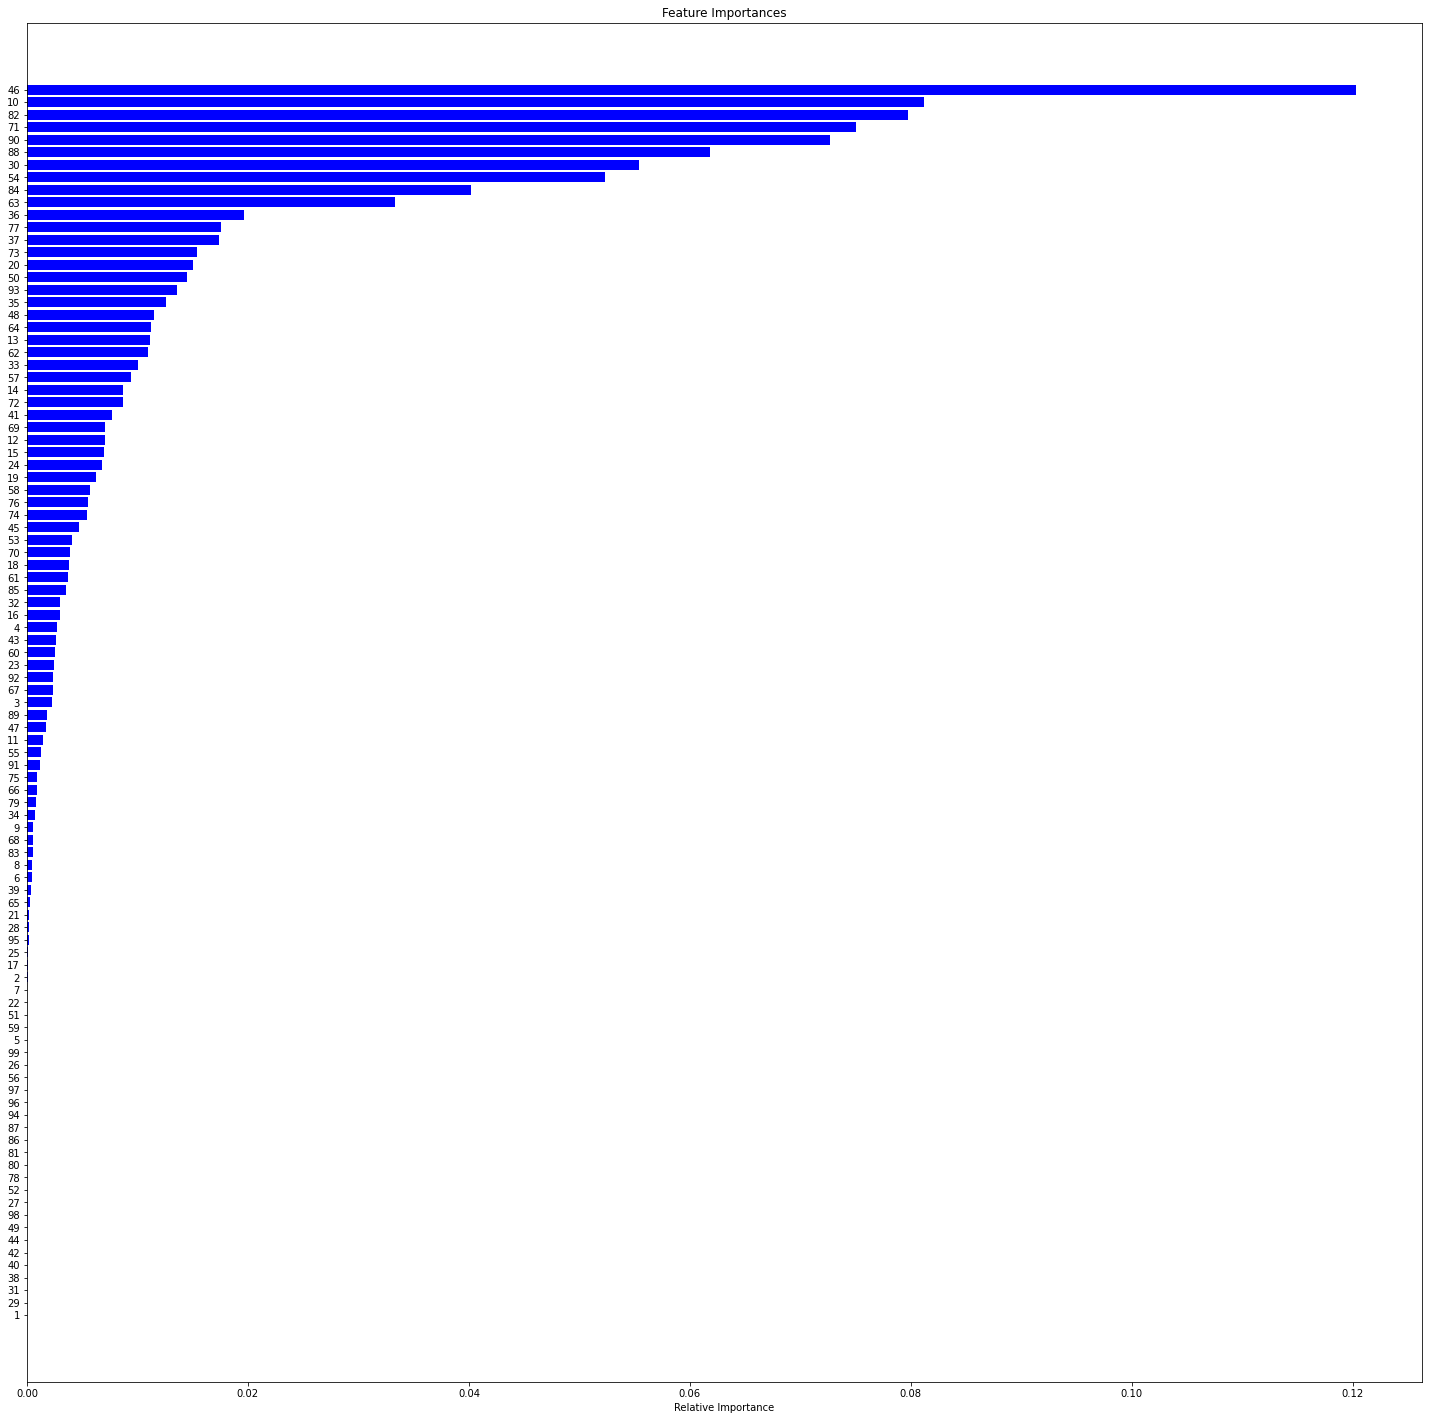

In [18]:
clf = RandomForestClassifier()
clf.fit(df_x, df_y)
importances = pd.Series(clf.feature_importances_)
features = df_x.columns
indices = np.argsort(importances)
plt.figure(figsize=(25,25))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [19]:
NFV_feature_importance = [str(features[i]) for i in indices[-20:]]
NFV_feature_importance

['64',
 '48',
 '35',
 '93',
 '50',
 '20',
 '73',
 '37',
 '77',
 '36',
 '63',
 '84',
 '54',
 '30',
 '88',
 '90',
 '71',
 '82',
 '10',
 '46']

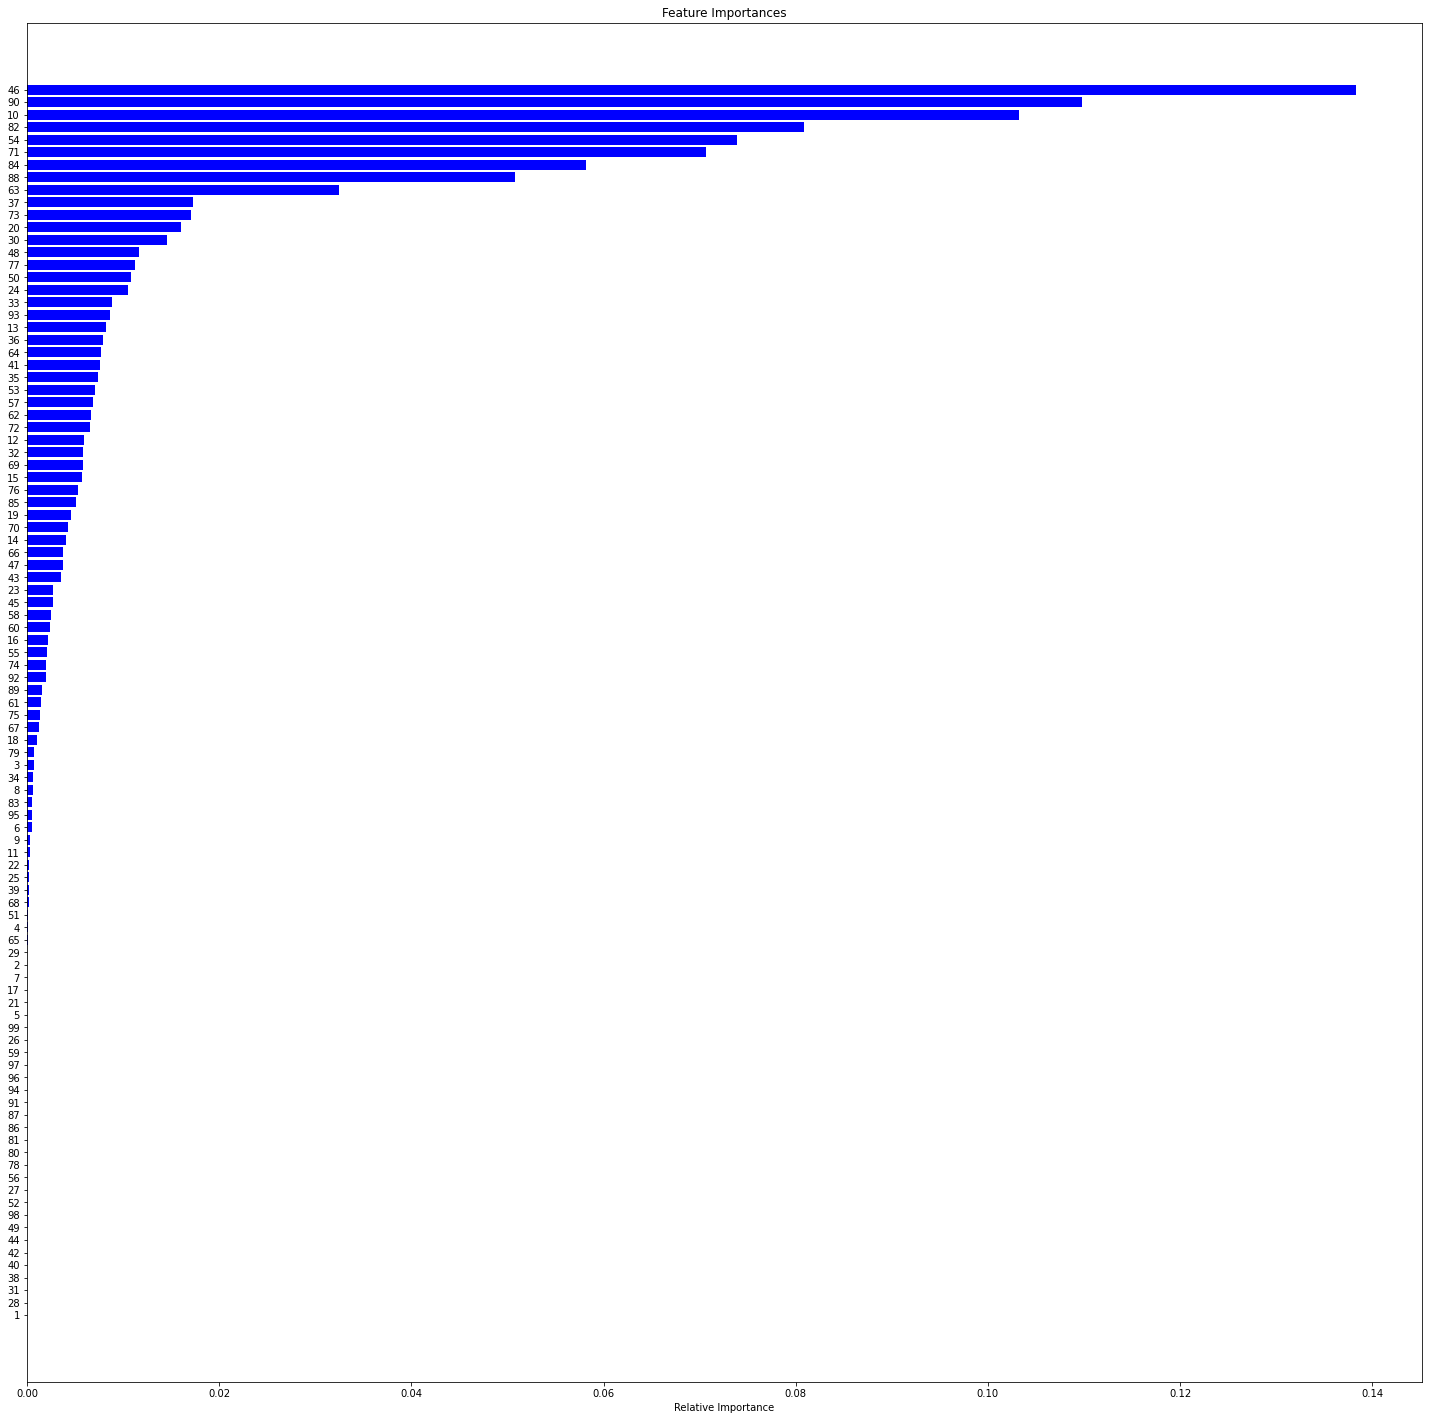

In [20]:
df_x = df_IDV_X
df_y = df_IDV_y
clf = RandomForestClassifier()
clf.fit(df_x, df_y)
importances = pd.Series(clf.feature_importances_)
features = df_x.columns
indices = np.argsort(importances)
plt.figure(figsize=(25,25))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [21]:
IDV_feature_importance = [str(features[i]) for i in indices[-20:]]
IDV_feature_importance

['13',
 '93',
 '33',
 '24',
 '50',
 '77',
 '48',
 '30',
 '20',
 '73',
 '37',
 '63',
 '88',
 '84',
 '71',
 '54',
 '82',
 '10',
 '90',
 '46']

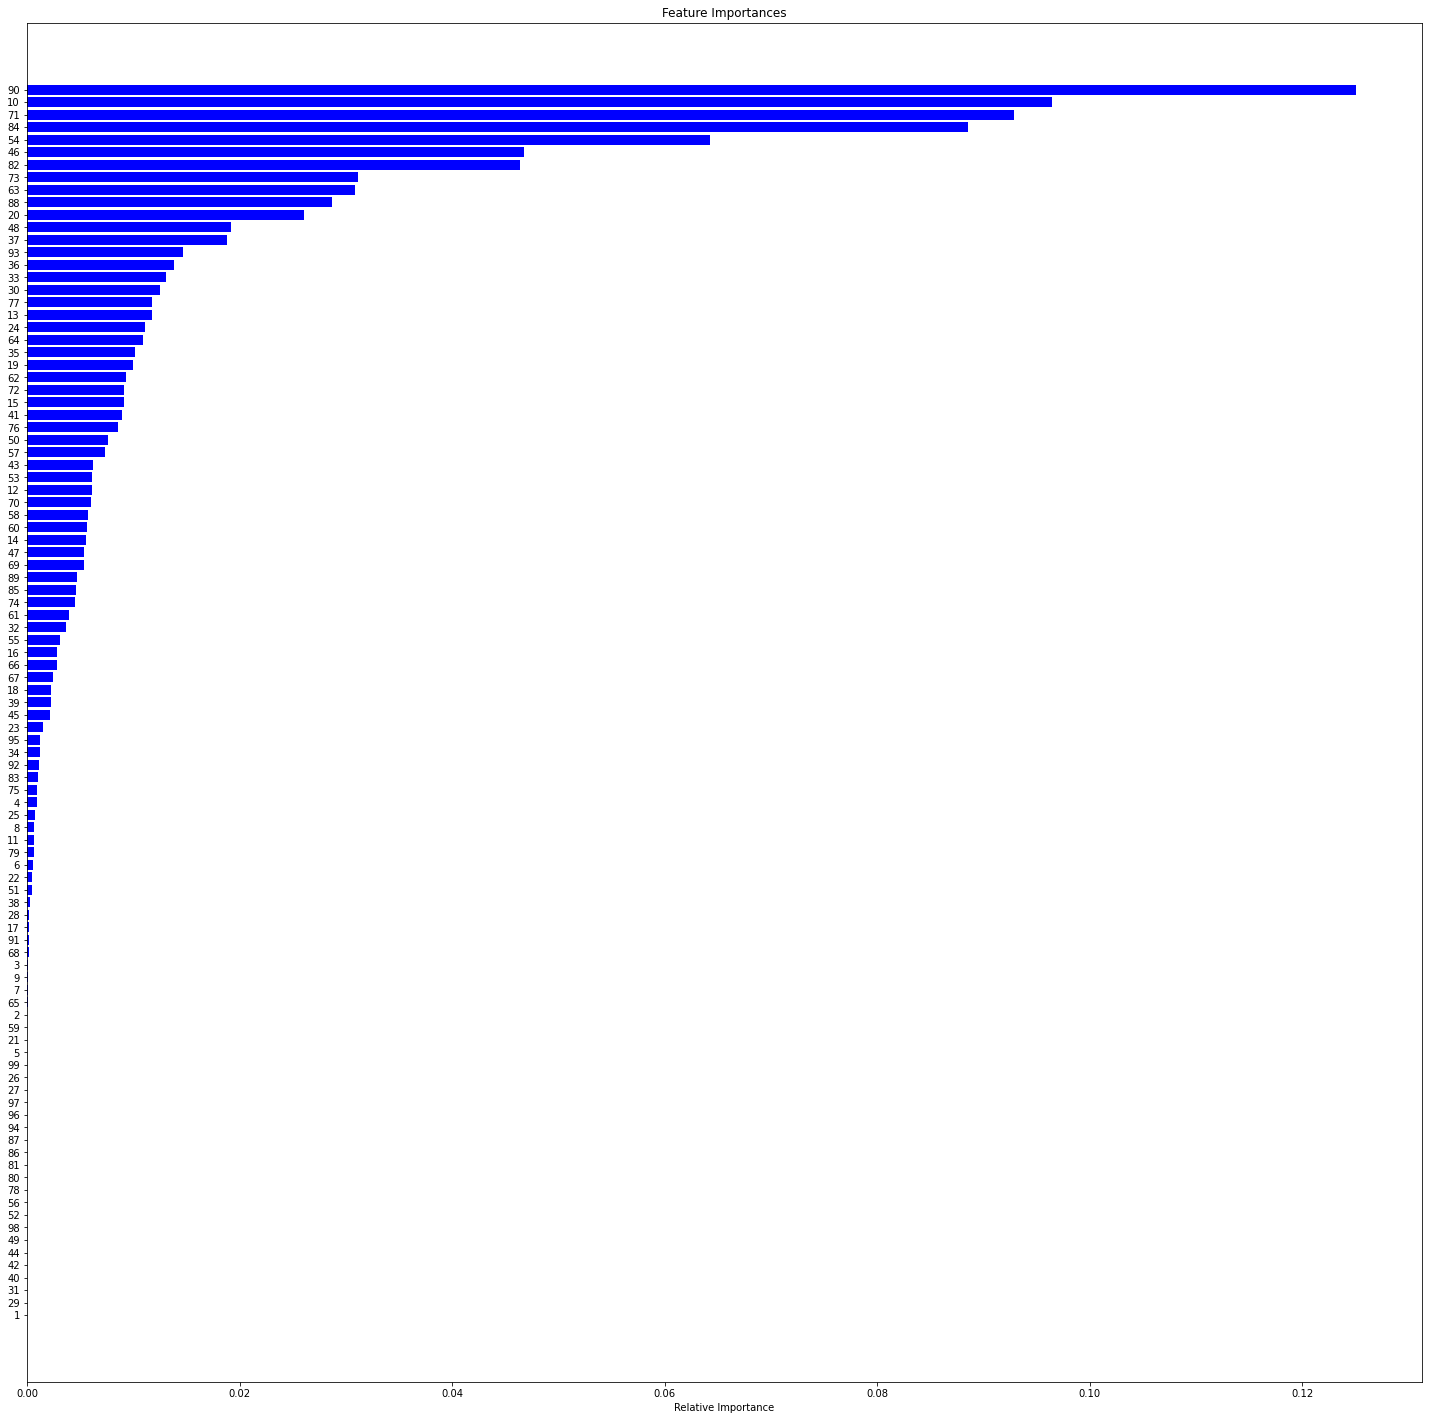

In [22]:
df_x = df_SQV_X
df_y = df_SQV_y
clf = RandomForestClassifier()
clf.fit(df_x, df_y)
importances = pd.Series(clf.feature_importances_)
features = df_x.columns
indices = np.argsort(importances)
plt.figure(figsize=(25,25))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [23]:
SQV_feature_importance = [str(features[i]) for i in indices[-20:]]
SQV_feature_importance

['24',
 '13',
 '77',
 '30',
 '33',
 '36',
 '93',
 '37',
 '48',
 '20',
 '88',
 '63',
 '73',
 '82',
 '46',
 '54',
 '84',
 '71',
 '10',
 '90']

In [24]:
print("NFV_feature_importance:",NFV_feature_importance)
print("IDV_feature_importance:",IDV_feature_importance)
print("SQV_feature_importance:",SQV_feature_importance)

NFV_feature_importance: ['64', '48', '35', '93', '50', '20', '73', '37', '77', '36', '63', '84', '54', '30', '88', '90', '71', '82', '10', '46']
IDV_feature_importance: ['13', '93', '33', '24', '50', '77', '48', '30', '20', '73', '37', '63', '88', '84', '71', '54', '82', '10', '90', '46']
SQV_feature_importance: ['24', '13', '77', '30', '33', '36', '93', '37', '48', '20', '88', '63', '73', '82', '46', '54', '84', '71', '10', '90']


# set train and test data

## model from all feature

## NFV


### RF

In [0]:
# clf = RandomForestClassifier(random_state=12345)
clf = RandomForestClassifier(random_state=12345,criterion='entropy',max_depth=8,max_features='auto',n_estimators=51,bootstrap=True,min_samples_leaf=2)

In [0]:
def plot_roc_curve(fprs, tprs):
    """Plot the Receiver Operating Characteristic from a list
    of true positive rates and false positive rates."""
    
    # Initialize useful lists + the plot axes.
    tprs_interp = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(14,10))
    
    # Plot ROC for each K-Fold + compute AUC scores.
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs)):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        
    # Plot the luck line.
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)
    
    # Plot the mean ROC.
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)
    
    # Plot the standard deviation around the mean ROC.
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')
    
    # Fine tune and show the plot.
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")
    plt.show()
    return (f, ax)

def compute_roc_auc(index):
    y_predict = clf.predict_proba(X.iloc[index])[:,1]
    fpr, tpr, thresholds = roc_curve(y.iloc[index], y_predict)
    auc_score = auc(fpr, tpr)
    return fpr, tpr, auc_score

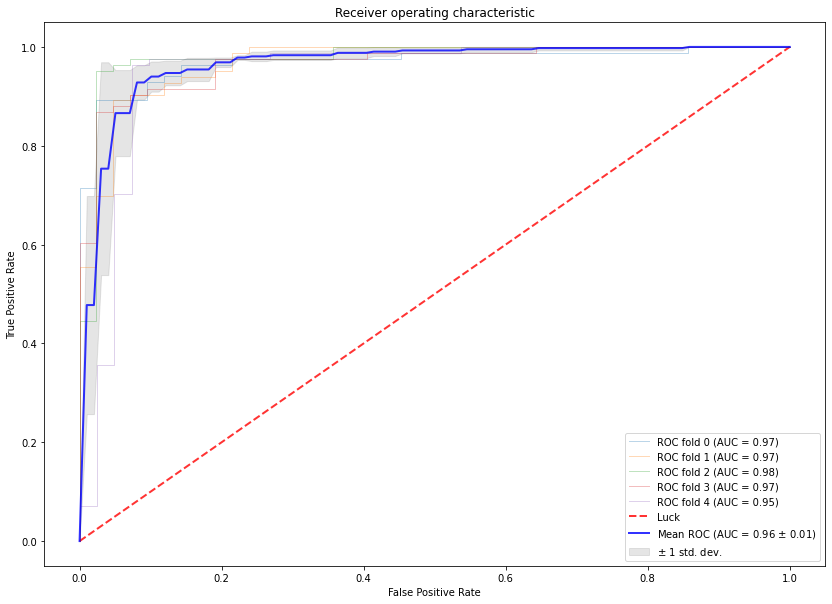

,AUC Train,AUC Test
0,0.984176,0.969388
1,0.984779,0.969019
2,0.983712,0.977912
3,0.986052,0.966150
4,0.986263,0.946283


In [28]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc ,accuracy_score
cv = StratifiedKFold(n_splits=5, random_state=12345, shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores = [], [], []

X = df_NFV_X
y = df_NFV_y
for (train, test), i in zip(cv.split(X, y), range(5)):
    clf.fit(X.iloc[train], y.iloc[train])
    _, _, auc_score_train = compute_roc_auc(train)
    fpr, tpr, auc_score = compute_roc_auc(test)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)

plot_roc_curve(fprs, tprs);
pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])

In [0]:
cv = StratifiedKFold(n_splits=5, random_state=12345, shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
acc = []

X = df_NFV_X
y = df_NFV_y
for (train, test), i in zip(cv.split(X, y), range(5)):
    clf.fit(X.iloc[train], y.iloc[train])
    y_pred = clf.predict(X.iloc[test])
    # print(classification_report(y.iloc[test], y_pred))
    acc.append(accuracy_score(y.iloc[test], y_pred))

In [30]:
avg = sum(acc)/len(acc)
print("The average is ", round(avg,4))

The average is  0.9265


###xgboot

In [0]:
from xgboost import XGBClassifier
model = XGBClassifier()

In [0]:
cv = StratifiedKFold(n_splits=5, random_state=12345, shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
acc = []

X = df_NFV_X
y = df_NFV_y
for (train, test), i in zip(cv.split(X, y), range(5)):
    model.fit(X.iloc[train], y.iloc[train])
    y_pred = clf.predict(X.iloc[test])
    # print(classification_report(y.iloc[test], y_pred))
    acc.append(accuracy_score(y.iloc[test], y_pred))

In [33]:
avg = sum(acc)/len(acc)
print("The average is ", round(avg,4))

The average is  0.9569


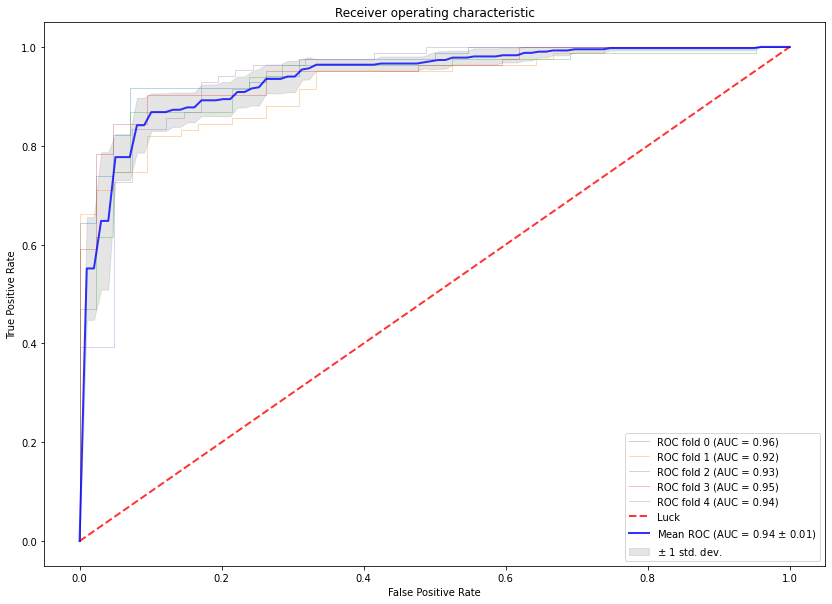

,AUC Train,AUC Test
0,0.934392,0.957483
1,0.943078,0.923408
2,0.939949,0.932587
3,0.937323,0.946357
4,0.939824,0.938734


In [50]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc ,accuracy_score
cv = StratifiedKFold(n_splits=5, random_state=12345, shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores = [], [], []

X = df_NFV_X
y = df_NFV_y
for (train, test), i in zip(cv.split(X, y), range(5)):
    model.fit(X.iloc[train], y.iloc[train])
    _, _, auc_score_train = compute_roc_auc(train)
    fpr, tpr, auc_score = compute_roc_auc(test)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)

plot_roc_curve(fprs, tprs);
pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])

## IDV

### RF

In [0]:
clf = RandomForestClassifier(random_state=12345,criterion='entropy',max_depth=10,max_features='log2',n_estimators=51,bootstrap=True,min_samples_leaf=2)

In [0]:
cv = StratifiedKFold(n_splits=5, random_state=12345, shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
acc = []

X = df_IDV_X
y = df_IDV_y
for (train, test), i in zip(cv.split(X, y), range(5)):
    clf.fit(X.iloc[train], y.iloc[train])
    y_pred = clf.predict(X.iloc[test])
    # print(classification_report(y.iloc[test], y_pred))
    acc.append(accuracy_score(y.iloc[test], y_pred))

In [36]:
avg = sum(acc)/len(acc)
print("The average is ", round(avg,4))

The average is  0.9261


###xgboot

In [0]:
cv = StratifiedKFold(n_splits=5, random_state=12345, shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
acc = []

X = df_IDV_X
y = df_IDV_y
for (train, test), i in zip(cv.split(X, y), range(5)):
    model.fit(X.iloc[train], y.iloc[train])
    y_pred = clf.predict(X.iloc[test])
    # print(classification_report(y.iloc[test], y_pred))
    acc.append(accuracy_score(y.iloc[test], y_pred))

In [38]:
avg = sum(acc)/len(acc)
print("The average is ", round(avg,4))

The average is  0.9429


##SQV

### RF

In [0]:
clf = RandomForestClassifier(random_state=12345,criterion='gini',max_depth=8,max_features='log2',n_estimators=301,bootstrap=True,min_samples_leaf=2)

In [0]:
cv = StratifiedKFold(n_splits=5, random_state=12345, shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
acc = []

X = df_SQV_X
y = df_SQV_y
for (train, test), i in zip(cv.split(X, y), range(5)):
    clf.fit(X.iloc[train], y.iloc[train])
    y_pred = clf.predict(X.iloc[test])
    # print(classification_report(y.iloc[test], y_pred))
    acc.append(accuracy_score(y.iloc[test], y_pred))

In [41]:
avg = sum(acc)/len(acc)
print("The average is ", round(avg,4))

The average is  0.8911


### xgboot

In [0]:
cv = StratifiedKFold(n_splits=5, random_state=12345, shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
acc = []

X = df_SQV_X
y = df_SQV_y
for (train, test), i in zip(cv.split(X, y), range(5)):
    model.fit(X.iloc[train], y.iloc[train])
    y_pred = clf.predict(X.iloc[test])
    # print(classification_report(y.iloc[test], y_pred))
    acc.append(accuracy_score(y.iloc[test], y_pred))

In [48]:
avg = sum(acc)/len(acc)
print("The average is ", round(avg,4))

The average is  0.9224


#parameter tune

### Random Search


In [0]:
def Plot_learning_curve(estimator, title, X, y, ylim = None, cv = None,
                        n_jobs = 1, train_sizes = np.linspace(0.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, 
                                                            X, y,
                                                            cv = cv,
                                                            n_jobs = n_jobs,
                                                            train_sizes = train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()
    return


In [0]:

Random_Search()

### Grid Search

In [0]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [0]:
param_grid = {"n_estimators": range(20, 100, 2),
                  "max_depth": range(4, 50, 2),
                  "min_samples_leaf": range(2, 100, 2),
                  'max_features': ['auto', 'sqrt', 'log2'],
                  "bootstrap": [True, False],
                  "criterion": ["gini", "entropy"]}

In [0]:
param_grid = {"n_estimators": range(1, 400, 50),
              "max_depth": [4,8, 10],
              "min_samples_leaf": [2, 100],
                  'max_features': ['auto', 'sqrt', 'log2'],
                  "bootstrap": [True, False],
                  "criterion": ["gini", "entropy"]}

In [0]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}

CV_rfc = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 10,scoring=scoring, refit='AUC', return_train_score=True)
CV_rfc.fit(X.iloc[train], y.iloc[train])

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=8,
                                              max_features='log2',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=2,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=301, n_jobs=None,
                                              oo...
             iid='deprecated', n_jobs=None,
             param_g

In [0]:
CV_rfc.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'n_estimators': 51}

In [0]:
# clf = RandomForestClassifier(random_state=42,criterion='entropy',max_depth=4,max_features='auto',n_estimators=200)
clf = RandomForestClassifier(random_state=12345,criterion='entropy',max_depth=10,max_features='log2',n_estimators=51,bootstrap=True,min_samples_leaf=2)
clf.fit(X.iloc[train], y.iloc[train])
y_pred = clf.predict(X.iloc[test])
print(classification_report(y.iloc[test], y_pred))
print(np.sum(y.iloc[test] == y_pred), y.iloc[test].shape)

              precision    recall  f1-score   support

           0       0.94      0.85      0.89        52
           1       0.89      0.96      0.92        67

    accuracy                           0.91       119
   macro avg       0.91      0.90      0.90       119
weighted avg       0.91      0.91      0.91       119

108 (119,)


In [0]:
from sklearn.model_selection import  cross_val_predict
predicted = cross_val_predict(clf, X_selected, y, cv=10)
print(classification_report(y, predicted))

NameError: ignored

In [0]:
predicted

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True, False,  True,  True,
       False,  True, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False])

In [0]:

for train,test in cv.split(X_selected,y):
  print(y.iloc[train])

KeyError: ignored

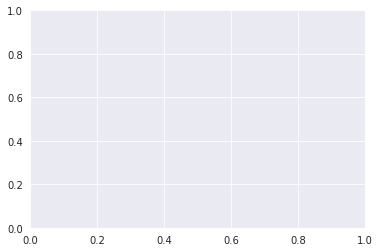

In [0]:
cv = StratifiedKFold(n_splits=6)
classifier = RandomForestClassifier(random_state=42,criterion='gini',max_depth=4,max_features='auto',n_estimators=101,bootstrap=False,min_samples_leaf=2)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X_selected, y)):
    classifier.fit(X[train], y[train])
    viz = plot_roc_curve(classifier, X[test], y[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: scipy.interp is deprecated and will be removed in 

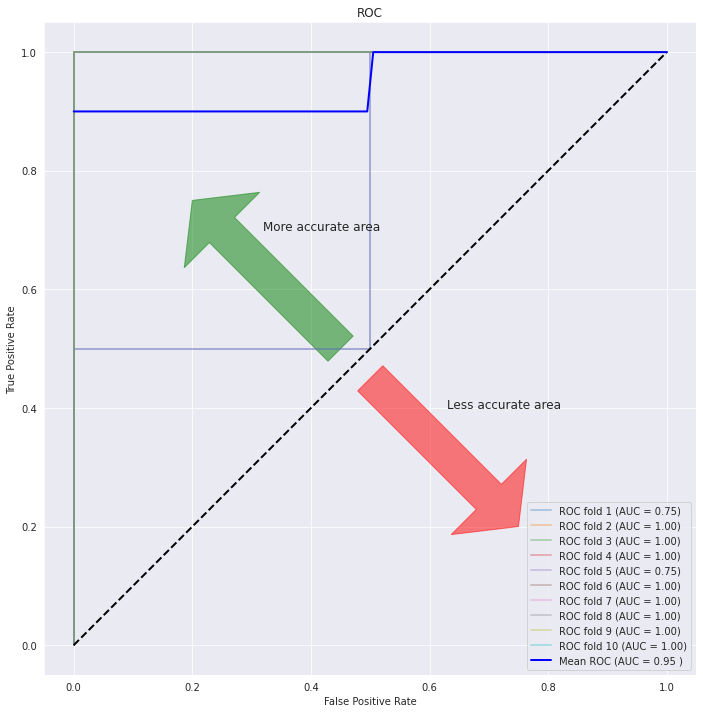

In [0]:
# plot arrows
import matplotlib.pylab as plt
from scipy import interp
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import StratifiedKFold
import matplotlib.patches as patches

fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )

cv = StratifiedKFold(n_splits=10,shuffle=False)
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(X_selected,y):
    prediction = clf.fit(X_selected.iloc[train],y.iloc[train]).predict_proba(X_selected.iloc[test])
    fpr, tpr, t = roc_curve(y.iloc[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

In [0]:
from sklearn.tree import export_graphviz# Export as dot file
export_graphviz(clf.estimators_[4] 
                ,out_file='tree.dot'
                ,feature_names = X_selected.columns
                ,class_names = [0,1]
                )

TypeError: ignored

In [0]:
max_features = list(range(1,train.shape[1]))train_results = []
test_results = []
for max_feature in max_features:
   rf = RandomForestClassifier(max_features=max_feature)
   rf.fit(x_train, y_train)   train_pred = rf.predict(x_train)   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)   y_pred = rf.predict(x_test)   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)from matplotlib.legend_handler import HandlerLine2Dline1, = plt.plot(max_features, train_results, ‘b’, label=”Train AUC”)
line2, = plt.plot(max_features, test_results, ‘r’, label=”Test AUC”)plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})plt.ylabel(‘AUC score’)
plt.xlabel(‘max features’)
plt.show()

In [0]:
X.shape

(36, 1395)

In [0]:
# clf = RandomForestClassifier()
# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)
# print(classification_report(y_test, y_pred))
# print(np.sum(y_test == y_pred), y_test.shape)

              precision    recall  f1-score   support

       False       0.91      0.83      0.87        12
        True       0.85      0.92      0.88        12

    accuracy                           0.88        24
   macro avg       0.88      0.88      0.87        24
weighted avg       0.88      0.88      0.87        24

21 (24,)


In [0]:
y_pred

array([False,  True, False, False, False, False, False, False,  True,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True])

## K-fold cross validation

In [0]:
def compute_roc_auc(index):
    y_predict = clf.predict_proba(X_selected.iloc[index])[:,1]
    fpr, tpr, thresholds = roc_curve(y.iloc[index], y_predict)
    auc_score = auc(fpr, tpr)
    return fpr, tpr, auc_score

In [0]:
def plot_roc_curve(fprs, tprs):
    """Plot the Receiver Operating Characteristic from a list
    of true positive rates and false positive rates."""
    
    # Initialize useful lists + the plot axes.
    tprs_interp = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(14,10))
    
    # Plot ROC for each K-Fold + compute AUC scores.
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs)):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        
    # Plot the luck line.
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Luck', alpha=.8)
    
    # Plot the mean ROC.
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2, alpha=.8)
    
    # Plot the standard deviation around the mean ROC.
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.')
    
    # Fine tune and show the plot.
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")
    plt.show()
    return (f, ax)

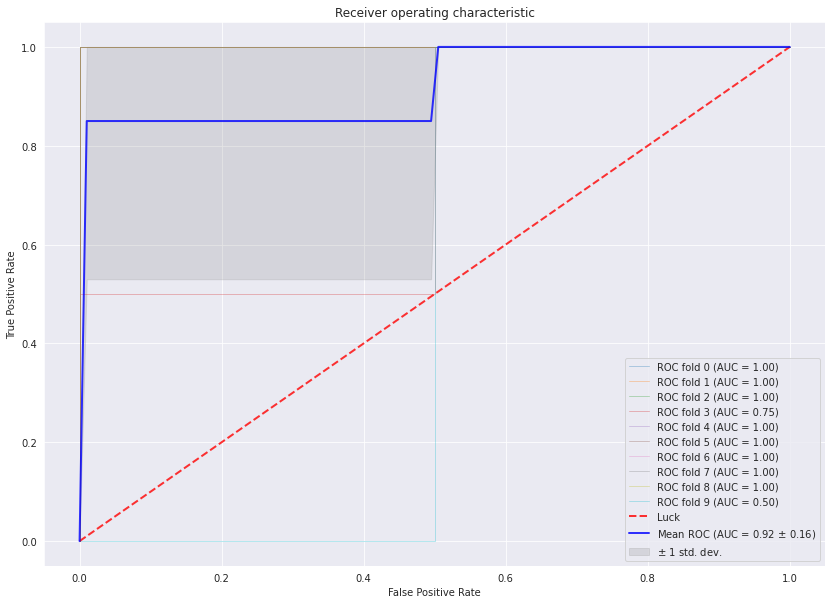

,AUC Train,AUC Test
0,1.0,1.00
1,1.0,1.00
2,1.0,1.00
3,1.0,0.75
4,1.0,1.00
5,1.0,1.00
6,1.0,1.00
7,1.0,1.00
8,1.0,1.00
9,1.0,0.50


In [0]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

cv = StratifiedKFold(n_splits=10, random_state=123, shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores = [], [], []
    
for (train, test), i in zip(cv.split(X_selected, y), range(10)):
    clf.fit(X_selected.iloc[train], y.iloc[train])
    _, _, auc_score_train = compute_roc_auc(train)
    fpr, tpr, auc_score = compute_roc_auc(test)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)

plot_roc_curve(fprs, tprs);
pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])

In [0]:
from sklearn.model_selection import  cross_val_predict
predicted = cross_val_predict(clf, X_selected, y, cv=10)
print(classification_report(y, predicted))

In [0]:
af_test = ['08219','08378','08405','08434','08455']
ns_test =['16265','16272']

In [0]:
df_af_test = pd.DataFrame()
df_ns_test = pd.DataFrame()

In [0]:
for i in tqdm_notebook(range(len(af_test))):
    idx = af_test[i]
    with open('samplesaf_test.csv', 'w') as outfile:
         subprocess.call(['rdsamp', '-r', 'afdb/{}'.format(idx), '-c', '-H','-f','330','-t','360','-v', '-ps'], stdout=outfile)
    df = pd.read_csv('samplesaf.csv', engine='python')
    df.columns = ['time', 'ECG1', 'ECG2']
    df.drop(df.index[[0]], inplace=True)
    for col in df.columns:
        df['id'] = idx
        df[col] = pd.to_numeric(df[col])
    df_af_test = df_af_test.append(df)

In [0]:
for i in tqdm_notebook(range(len(ns_test))):
    idx = ns_test[i]
    with open('samplesaf_test.csv', 'w') as outfile:
         subprocess.call(['rdsamp', '-r', 'nsrdb/{}'.format(idx), '-c', '-H','-f','330','-t','360','-v', '-ps'], stdout=outfile)
    df = pd.read_csv('samplesns.csv', engine='python')
    df.columns = ['time', 'ECG1', 'ECG2']
    df.drop(df.index[[0]], inplace=True)
    for col in df.columns:
        df['id'] = idx
        df[col] = pd.to_numeric(df[col])
    df_ns_test = df_ns_test.append(df)

In [0]:
df_test = df_af_test.append(df_ns_test)

In [0]:
X_df_test = extract_features(df_test,column_id='id', column_sort='time')

In [0]:
out = clf.predict(X_df_test.dropna(axis=1)[X_selected.columns])
print(out)

In [0]:
clf.estimators_[40]

In [0]:
estimator = clf.estimators_[5]
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X_selected.columns
                # ,class_names = ['True','False'],
                # rounded = True, proportion = False, 
                # precision = 2, filled = True
                ,filled=True,
                rounded=True
                )



In [0]:
# Convert to png
from subprocess import call
print(call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600']))

1


In [0]:
# Save the tree as a png image
# export_graphviz(estimator, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
from sklearn.tree import export_graphviz
import pydot
(graph, ) = pydot.graph_from_dot_file('/content/tree.dot')
graph.write_png('tree.png');

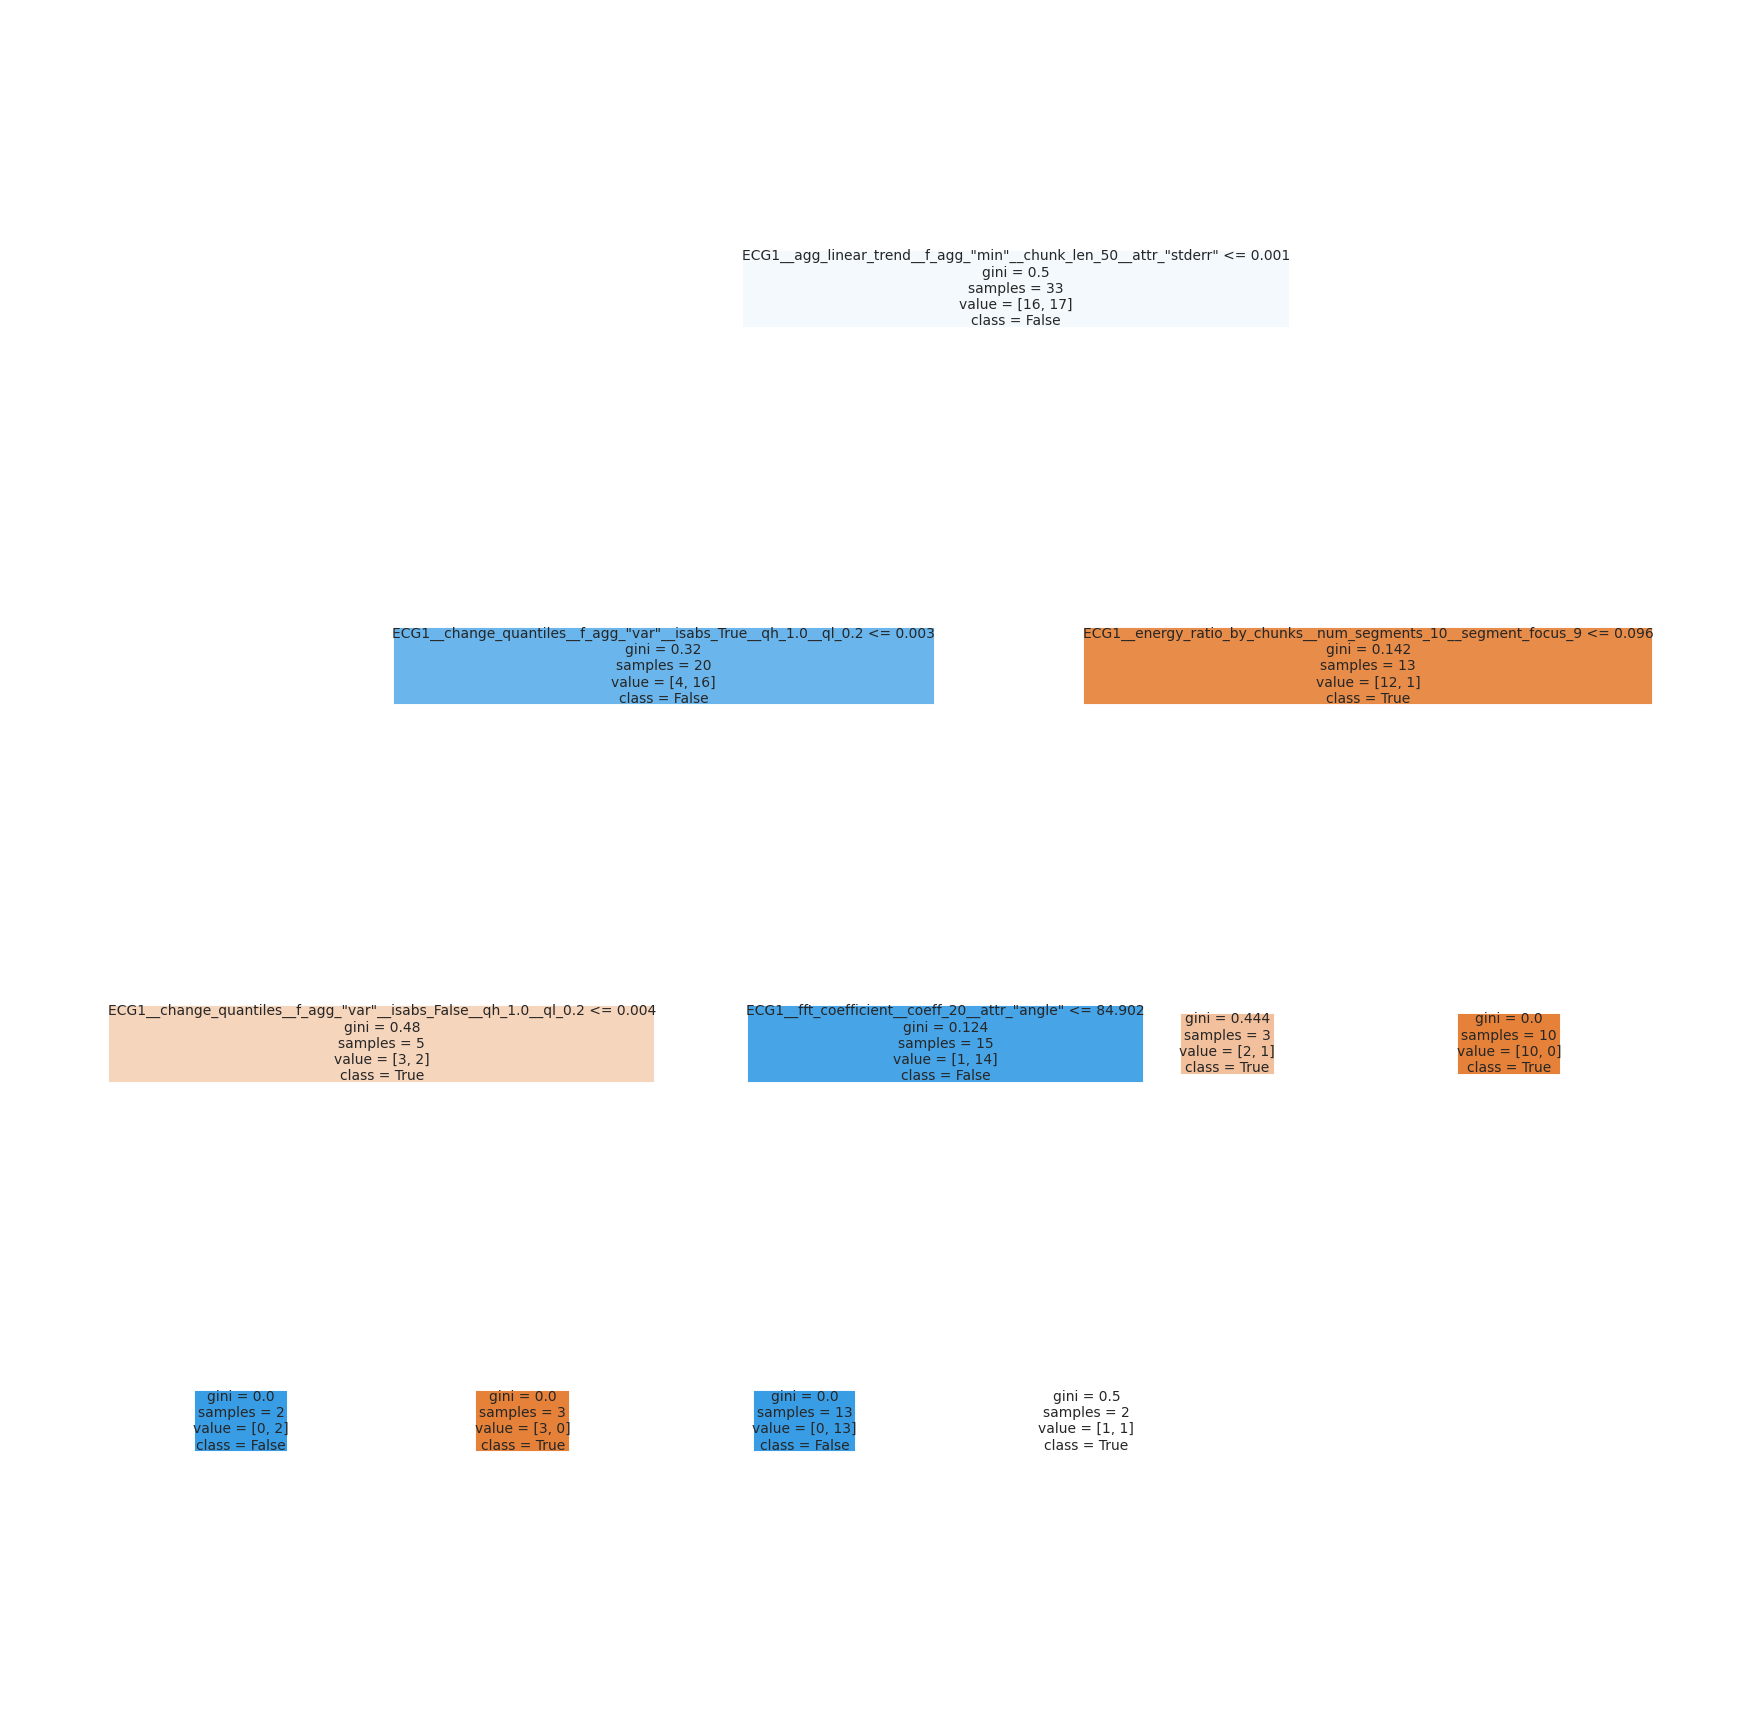

In [0]:
from sklearn import tree
fn=X_selected.columns
cn=['True','False']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,2), dpi=1000)
tree.plot_tree(clf.estimators_[4],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')

In [0]:

# Display in jupyter notebook
from IPython.display import Image
Image(filename = '/content/tree.png')

FileNotFoundError: ignored

#Test


In [0]:
X_selected =

In [0]:
X_selected.to_csv('x_select.csv')
y.to_csv('y.csv')

In [0]:
!ls

In [0]:
X_selected = pd.DataFrame()
X_selected = pd.read_csv('/content/x_select.csv', engine='python')

In [0]:
y = pd.Series()
y = pd.read_csv('/content/y.csv', engine='python')
# y.columns = ['id', 'label']

In [0]:
y

In [0]:
testtrain_xy = train_test_split(X_selected, y,test_size=.95,random_state=50)
X_train, X_test, y_train, y_test = testtrain_xy
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [0]:
!pwd

/content


In [0]:
print(X_train,y_train)

In [0]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(np.sum(y_test == y_pred), y_test.shape)

NameError: ignored